In [2]:
#importing Natural Language Toolkit
import nltk
import pandas as pd
import numpy as np

In [3]:
#getting SMSSpam dataset
dataset=pd.read_csv("SMSSpamCollection.tsv",sep="\t",header=None)

dataset.columns=['label','body_text']

dataset.head()

,label,body_text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [4]:
#To find the shape of the data
print("Input data has {} rows and {} columns".format(len(dataset),len(dataset.columns)))

Input data has 5568 rows and 2 columns


In [5]:
#To find how many spam and ham are there in dataset
print("Out of {} rows, {} are Spam {} are Ham".format(len(dataset),len(dataset[dataset['label']=='spam']),
                                                     len(dataset[dataset['label']=='ham'])))

Out of 5568 rows, 746 are Spam 4822 are Ham


In [6]:
# To Find Missing Data
print("Number of null in label: {}".format(dataset['label'].isnull().sum()))

print("Number of null in text: {}".format(dataset['body_text'].isnull().sum()))

Number of null in label: 0
Number of null in text: 0


In [7]:
# Cleaning or Preprocessing
# Here first step in cleaning is Remove Punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [8]:
def remove_punct(text):
    text_nopunct="".join([char for char in text if char not in string.punctuation])
    return text_nopunct

dataset['body_text_clean']=dataset['body_text'].apply(lambda x:remove_punct(x))
dataset.head()

,label,body_text,body_text_clean
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL


In [9]:
# Tokenizing Process
import re

def tokenize(text):
    tokens=re.split('\W',text)
    return tokens

dataset['body_text_tokenized']=dataset['body_text_clean'].apply(lambda x:tokenize(x.lower()))

dataset.head()

,label,body_text,body_text_clean,body_text_tokenized
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]"


In [12]:
# Removing Stopwords
stopwords=nltk.corpus.stopwords.words('english')

def remove_stopwords(tokenized_list):
    text=[word for word in tokenized_list if word not in stopwords]
    return text

dataset['body_text_nostop']=dataset['body_text_tokenized'].apply(lambda x:remove_stopwords(x))

dataset.head()

,label,body_text,body_text_clean,body_text_tokenized,body_text_nostop
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t..."
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]"


In [11]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gurua\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [16]:
# Stemming
ps=nltk.PorterStemmer()

def stemming(tokenized_text):
    text=[ps.stem(word) for word in tokenized_text]
    return text

dataset['body_text_stemmed']=dataset['body_text_nostop'].apply(lambda x:stemming(x))

dataset.head()

,label,body_text,body_text_clean,body_text_tokenized,body_text_nostop,body_text_stemmed
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather...","[ive, search, right, word, thank, breather, pr..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho..."
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]"


In [17]:
# Last Preprocessing - Lemmatization
wn= nltk.WordNetLemmatizer()

def lemmatizing(tokenized_text):
    text=[wn.lemmatize(word) for word in tokenized_text]
    return text

dataset['body_text_lemmatized']=dataset['body_text_nostop'].apply(lambda x:lemmatizing(x))

dataset.head()

,label,body_text,body_text_clean,body_text_tokenized,body_text_nostop,body_text_stemmed,body_text_lemmatized
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather...","[ive, search, right, word, thank, breather, pr...","[ive, searching, right, word, thank, breather,..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...","[nah, dont, think, go, usf, life, around, though]"
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,...","[even, brother, like, speak, treat, like, aid,..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]","[date, sunday]"


In [15]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gurua\AppData\Roaming\nltk_data...


True

In [19]:
# To create a document-term matrix (Count Vectorization)
from sklearn.feature_extraction.text import CountVectorizer

def clean_text(text):
    text="".join([word.lower() for word in text if word not in string.punctuation])
    tokens=re.split('\W',text)
    text=[ps.stem(word) for word in tokens if word not in stopwords]
    return text

count_vect= CountVectorizer(analyzer=clean_text)
X_count=count_vect.fit_transform(dataset['body_text'])
print(X_count.shape)
print(count_vect.get_feature_names_out())

(5568, 8107)
['' '0' '008704050406' ... 'ü' 'üll' '〨ud']


In [20]:
# A sparse matrix is in which most entries are 0. 
#In the interest of efficient storage a sparse matrix will be stored by only storing the locations of the non-zero elements.
X_count

<5568x8107 sparse matrix of type '<class 'numpy.int64'>'
	with 50971 stored elements in Compressed Sparse Row format>

In [21]:
# To create a dataframe from the obtained sparse matrix
x_counts_df= pd.DataFrame(X_count.toarray())
x_counts_df

,0,1,2,3,4,5,6,7,8,9,...,8097,8098,8099,8100,8101,8102,8103,8104,8105,8106
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5563,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5564,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5565,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5566,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
x_counts_df.columns= count_vect.get_feature_names_out()
x_counts_df

,,0,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,...,zindgi,zoe,zogtoriu,zoom,zouk,zyada,é,ü,üll,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5563,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5564,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5565,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5566,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
#TF-IDF- Term Frequency, Inverse Document Frequency
# To Create a document term matrix where the column represents single unique terms (unigrams)
# but the cell represents a weighting meant to represent how important a word is to a document
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect=TfidfVectorizer(analyzer=clean_text)
X_tfidf=tfidf_vect.fit_transform(dataset['body_text'])
print(X_tfidf.shape)
print(tfidf_vect.get_feature_names_out())

(5568, 8107)
['' '0' '008704050406' ... 'ü' 'üll' '〨ud']


In [27]:
x_tfidf_df=pd.DataFrame(X_tfidf.toarray())
x_tfidf_df.columns=tfidf_vect.get_feature_names_out()
x_tfidf_df

,,0,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,...,zindgi,zoe,zogtoriu,zoom,zouk,zyada,é,ü,üll,〨ud
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5563,0.093604,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
5564,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.335215,0.0,0.0
5565,0.148439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
5566,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [28]:
# To perform Feature Engineering to fit random forest model
dataset=pd.read_csv("SMSSpamCollection.tsv",sep="\t",header=None)

dataset.columns=['label','body_text']

dataset.head()

,label,body_text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [29]:
#Creating feature for text message length
dataset["body_len"]=dataset["body_text"].apply(lambda x:len(x)-x.count(" "))

dataset.head()

,label,body_text,body_len
0,ham,I've been searching for the right words to tha...,160
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128
2,ham,"Nah I don't think he goes to usf, he lives aro...",49
3,ham,Even my brother is not like to speak with me. ...,62
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28


In [30]:
# Creating feature for % of text that is punctuation
def count_punct(text):
    count=sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text)-text.count(" ")),3)*100

dataset["punct%"]=dataset["body_text"].apply(lambda x:count_punct(x))

dataset.head()

,label,body_text,body_len,punct%
0,ham,I've been searching for the right words to tha...,160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
2,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
3,ham,Even my brother is not like to speak with me. ...,62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1


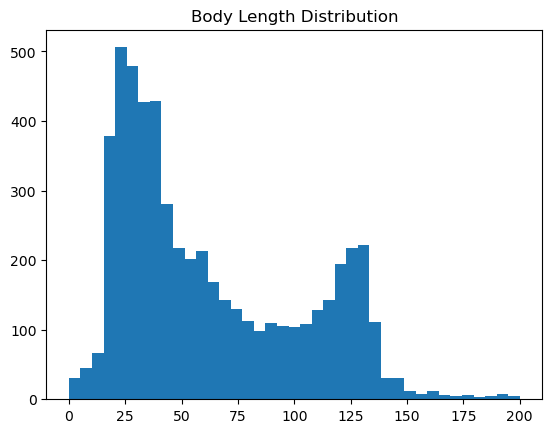

In [31]:
import matplotlib.pyplot as plt
import numpy as np

bins=np.linspace(0,200,40)

plt.hist(dataset['body_len'],bins)
plt.title("Body Length Distribution")
plt.show()

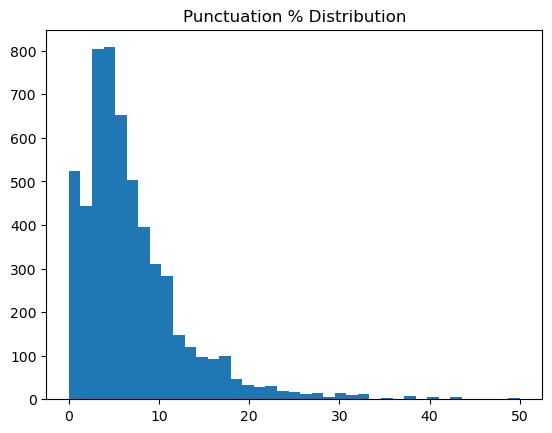

In [32]:
bins=np.linspace(0,50,40)

plt.hist(dataset['punct%'],bins)
plt.title('Punctuation % Distribution')
plt.show()

In [33]:
# Building Machine Learning Classifier using Random Forest Model
dataset=pd.read_csv("SMSSpamCollection.tsv",sep="\t",header=None)

dataset.columns=['label','body_text']

dataset.head()

,label,body_text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [34]:
def count_punct(text):
    count=sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text)-text.count(" ")),3)*100

dataset["body_len"]=dataset["body_text"].apply(lambda x:len(x)-x.count(" "))
dataset["punct%"]=dataset["body_text"].apply(lambda x:count_punct(x))

dataset.head()

,label,body_text,body_len,punct%
0,ham,I've been searching for the right words to tha...,160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
2,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
3,ham,Even my brother is not like to speak with me. ...,62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1


In [35]:
def clean_text(text):
    text="".join([word.lower() for word in text if word not in string.punctuation])
    tokens=re.split('\W',text)
    text=[ps.stem(word) for word in tokens if word not in stopwords]
    return text

tfidf_vect=TfidfVectorizer(analyzer=clean_text)
X_tfidf=tfidf_vect.fit_transform(dataset['body_text'])

In [36]:
X_features=pd.concat([dataset['body_len'],dataset['punct%'],pd.DataFrame(X_tfidf.toarray())],axis=1)
X_features.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,8097,8098,8099,8100,8101,8102,8103,8104,8105,8106
0,160,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,128,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,49,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,62,3.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,28,7.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score

# Convert feature names to strings if they are not already strings
X_features.columns = X_features.columns.astype(str)

rf = RandomForestClassifier(n_jobs=1)
k_fold = KFold(n_splits=5)

# Perform cross-validation
scores = cross_val_score(rf, X_features, dataset['label'], cv=k_fold, scoring='accuracy', n_jobs=1)

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())


Cross-validation scores: [0.97576302 0.97935368 0.97576302 0.96675651 0.97304582]
Mean accuracy: 0.9741364097551217


In [41]:
# Model using Train Test Split
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test=train_test_split(X_features, dataset['label'],test_size=0.3,random_state=0)

rf=RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1)
rf_model=rf.fit(X_train, y_train)

In [43]:
sorted(zip(rf_model.feature_importances_, X_train.columns),reverse=True)[0:10]

[(0.06469999007325584, 'body_len'),
 (0.04600186762619483, '1804'),
 (0.044984170501886724, '3135'),
 (0.034489172577956834, '4799'),
 (0.030641961536152368, '5727'),
 (0.022095958937084034, '6749'),
 (0.021761433141908024, '2032'),
 (0.019516345476601415, '7221'),
 (0.017025374859311104, '392'),
 (0.015877284980021233, '7030')]

# `Naveen KM` and `Guruakash P`

In [47]:
new_text_message = "Congratulations! You've won a free cruise. Call now to claim your prize!"
stopwords=nltk.corpus.stopwords.words('english')
def preprocess_text(text):
    # Tokenization: Split the text into words
    tokens = re.split('\W+', text)
    
    # Convert to lowercase and remove punctuation
    tokens = [word.lower() for word in tokens if word.isalnum()]
    
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords]
    
    # Stemming
    tokens = [ps.stem(word) for word in tokens]
    
    # Join tokens back into a single string
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text
preprocessed_text = preprocess_text(new_text_message)
print(preprocessed_text)

predicted_label = rf_model.predict(preprocessed_text)

if predicted_label == 1:
    print("The text message is classified as spam.")
else:
    print("The text message is classified as ham.")


congratul free cruis call claim prize


C:\Users\gurua\conda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: could not convert string to float: 'congratul free cruis call claim prize'

In [51]:
# Assuming you have trained your model and stored it in the variable 'rf_model'

# New text message to be tested
new_text_message = "Congratulations! You've won a free cruise. Call now to claim your prize!"

# Preprocess the new text message using the same preprocessing function used during training
preprocessed_text = preprocess_text(new_text_message)

# Create a new CountVectorizer instance and fit it with the training data
count_vect = CountVectorizer(analyzer=preprocess_text)
X_train_counts = count_vect.fit_transform(train_data)  # Assuming 'train_data' is your training data

# Vectorize the preprocessed text using the fitted CountVectorizer
X_new = count_vect.transform([preprocessed_text])

# Predict using the trained model
predicted_label = rf_model.predict(X_new)

# Map the predicted label to the corresponding class (e.g., spam or ham)
if predicted_label == 1:
    print("The text message is classified as spam.")
else:
    print("The text message is classified as ham.")


NameError: name 'train_data' is not defined